In [42]:
using ConstLab
using Plots
gadfly!();

In [2]:
include("mises_mixed_hardening.jl")

compute_residual (generic function with 1 method)

### Parameters

In [3]:
E = 200.0 * 10^9
ν =  0.3
σy =  200.0*10^6
H = 0.1 * 200*10^9
κ_∞ = 0.1 * σy
α_∞ = 0.1 * σy
r = 0.5
mp = MisesMixedHardMP(E, ν, σy, H, r, κ_∞, α_∞)

MisesMixedHardMP
  E: 2.0e11
  ν: 0.3
  σy: 2.0e8
  H: 2.0e10
  r: 0.5
  κ_∞: 2.0e7
  α_∞: 2.0e7

### Material Status

In [4]:
ms = MisesMixedHardMS()

MisesMixedHardMS
  n_ε_p: [0.0,0.0,0.0,0.0,0.0,0.0]
  n_α_dev: [0.0,0.0,0.0,0.0,0.0,0.0]
  n_κ: 0.0
  n_μ: 0.0

### Load case: Plain Strain

In [5]:
tend = 1.0
ts = collect(linspace(0, tend, 100))
ε_max = 0.01
εs_pstrain, σs_pstrain, ε_control_pstrain = loadcase(:uniaxial_strain, ε_max, ts);

In [6]:
εs_res_pstrain, σs_res_pstrain, matstats = driver(ms, mp, ts, εs_pstrain, 
σs_pstrain, ε_control_pstrain);

### Load case: Plain Uniaxial stress

In [7]:
ts = collect(linspace(0, 1, 100))
ε_max = 0.01
εs_pstress, σs_pstress, ε_control_pstress = loadcase(:uniaxial_stress, ε_max, ts);
εs_res_pstress, σs_res_pstress, matstats = driver(ms, mp, ts, εs_pstress, 
                                                  σs_pstress, ε_control_pstress, ftol = 1e-5);

### Plotting

In [8]:
const Idev6 = 1/3 * Float64[ 2    -1    -1     0     0     0;
                            -1     2    -1     0     0     0;
                            -1    -1     2     0     0     0;
                             0     0     0     3     0     0;
                             0     0     0     0     3     0;
                             0     0     0     0     0     3]
function vm(x)
    x = Idev6 * x
    sqrt(3/2) * sqrt(x[1]^2 + x[2]^2 + x[3]^2 + (2x[4])^2 + (2x[5])^2 + (2x[6])^2)
end

vm (generic function with 1 method)

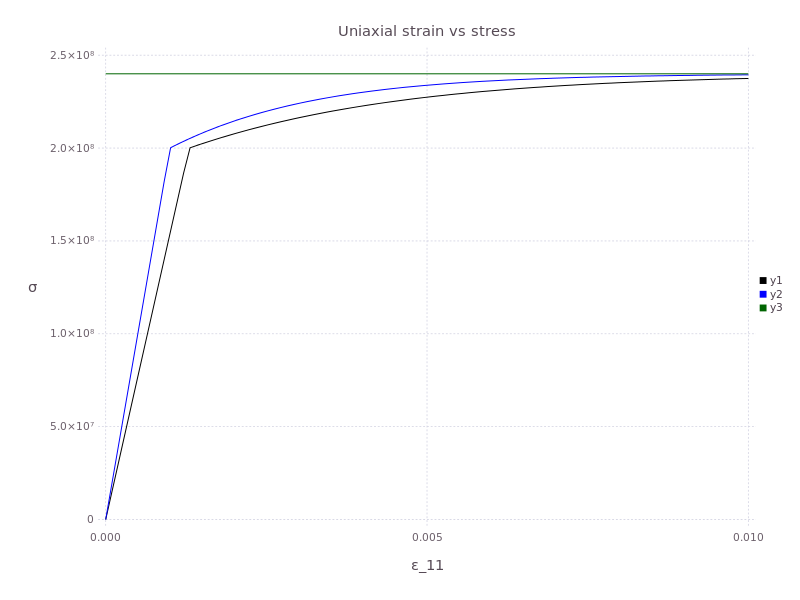

In [50]:
p = plot(εs_res_pstrain, σs_res_pstrain, matstats; x_mod = 1, y_mod = vm);
p = plot!(p, εs_res_pstress, σs_res_pstress, matstats; x_mod = 1, y_mod = vm);
p = plot!(p, εs_res_pstress, (mp.κ_∞ + mp.α_∞ + mp.σy) * ones(ts), matstats; x_mod = 1)
xlabel!(p, "ε_11"); ylabel!(p, "σ"); title!(p, "Uniaxial strain vs stress")